In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [13]:
from sklearn.cluster import KMeans

## All Columns

In [14]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### filling in missing data

In [15]:
penguins["sex"] = penguins["sex"].fillna("Unknown")
penguins = penguins.fillna(0)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,Unknown
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### pairplot

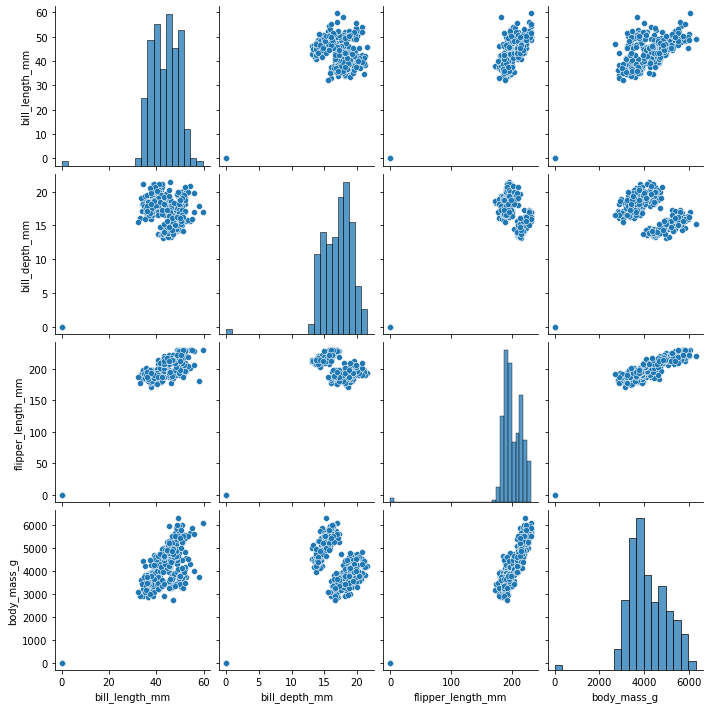

In [16]:
sns.pairplot(penguins)

### create clusters

In [33]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
km = KMeans(n_clusters=3, random_state =43).fit(penguins[features])

In [34]:
penguins["cluster"] = km.predict(penguins[features])

In [35]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,Unknown,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1


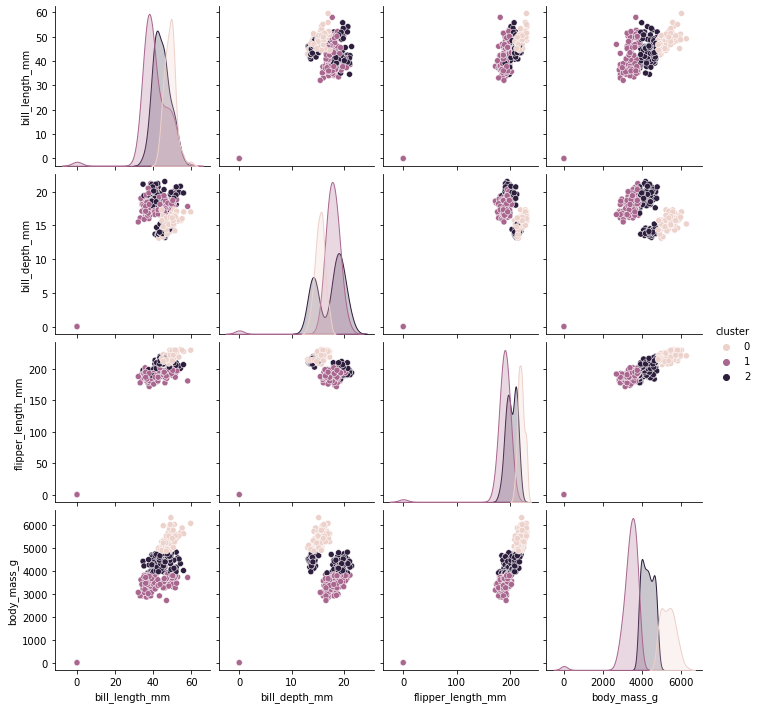

In [36]:
sns.pairplot(penguins, hue="cluster")

In [39]:
conti_t = penguins.groupby(['species', 'cluster']).size().unstack('cluster', fill_value=0)
conti_t

cluster,0,1,2
species,,,
Adelie,0,98,54
Chinstrap,0,46,22
Gentoo,81,1,42


Most clustors contain the same all 3 penguins. clustor 0 only contains Gentoo penguins. The fact that most clustors contain all 3 penguins maean that there is barely any difference between the penguins when it comes to the flippers, bills and body mass. If it was about only these charactaristics there would only be one type of penguin.